Import required libraries

In [ ]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
sns.set_style('whitegrid')

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, KFold

Load the Boston housing dataset

In [ ]:
data = pd.read_csv('boston.csv')
data.drop('Unnamed: 0', axis=1, inplace=True)
print("Shape of the dataset:", data.shape)
data.head()

Shape of the dataset: (506, 14)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Preprocess the data

In [3]:
X = np.array(data['lstat']).reshape(-1, 1)
# X = data.drop('medv', axis=1)
print("Shape of X:", X.shape)
y = data['medv']
print("Shape of y:", y.shape)

# X.dtypes  # checking to ensure all features are numerical

Shape of X: (506, 1)
Shape of y: (506,)


Split the data for training and testing

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)
# ensuring the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (404, 1)
Shape of y_train: (404,)
Shape of X_test: (102, 1)
Shape of y_test: (102,)


Find appropriate value of k for Knn regressor using kfold

In [26]:
def get_score(model, X_train, X_test, y_train, y_test):
    r2= cross_val_score(model, X_train, y_train, cv=5)
    mse = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    return [np.mean(r2), np.mean(mse)]
def cv_scores(models, X, y, folds):
    scores = {name: [] for name in models}
    for train_index, test_index in folds.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        for name, model in models.items():
            scores[name].append(get_score(model, X_train, X_test, y_train, y_test))
    return scores

In [27]:
scores = cv_scores({'KNN': KNeighborsRegressor()}, X, y, KFold(n_splits=5)).mean()


AttributeError: 'dict' object has no attribute 'mean'

In [21]:

# Define K-Fold cross-validator (10 folds, shuffled)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Run cross-validation with R² as the metric
scores_r2 = cross_val_score(knn, X, y, cv=kf, scoring='r2')
scores_mse = cross_val_score(knn, X, y, cv=kf, scoring='mean_squared_error')

# Print results
print("R² scores for each fold:", scores_r2)
print("R² scores for each fold:", scores_mse)
print("Mean R²:", np.mean(scores))
print("Std deviation:", np.std(scores))

InvalidParameterError: The 'scoring' parameter of cross_val_score must be a str among {'recall_samples', 'adjusted_rand_score', 'accuracy', 'jaccard', 'neg_mean_absolute_error', 'neg_mean_gamma_deviance', 'normalized_mutual_info_score', 'jaccard_micro', 'roc_auc_ovo', 'roc_auc_ovr', 'v_measure_score', 'jaccard_samples', 'fowlkes_mallows_score', 'positive_likelihood_ratio', 'jaccard_macro', 'balanced_accuracy', 'neg_mean_squared_error', 'mutual_info_score', 'roc_auc_ovr_weighted', 'homogeneity_score', 'matthews_corrcoef', 'neg_negative_likelihood_ratio', 'adjusted_mutual_info_score', 'neg_mean_absolute_percentage_error', 'f1_samples', 'f1_macro', 'neg_root_mean_squared_error', 'd2_absolute_error_score', 'precision', 'rand_score', 'neg_mean_poisson_deviance', 'f1_micro', 'precision_weighted', 'roc_auc_ovo_weighted', 'top_k_accuracy', 'neg_median_absolute_error', 'f1', 'neg_root_mean_squared_log_error', 'recall', 'r2', 'average_precision', 'recall_micro', 'precision_micro', 'neg_max_error', 'neg_brier_score', 'neg_mean_squared_log_error', 'completeness_score', 'precision_macro', 'f1_weighted', 'precision_samples', 'recall_macro', 'explained_variance', 'neg_log_loss', 'jaccard_weighted', 'recall_weighted', 'roc_auc'}, a callable or None. Got 'mean_squared_error' instead.

In [6]:
print("training MSE:", mean_squared_error(y_train, knn.predict(X_train)))
print("training R2 score:", r2_score(y_train, knn.predict(X_train)))

training MSE: 22.493675247524756
training R2 score: 0.7410752398884222


Predict and testing the model

In [7]:
y_pred = knn.predict(X_test)
print("testing MSE:", mean_squared_error(y_test, y_pred))
print("testing R2 score:", r2_score(y_test, y_pred))

testing MSE: 26.573427450980397
testing R2 score: 0.6376373029482832


Plot the predicted values against the actual values

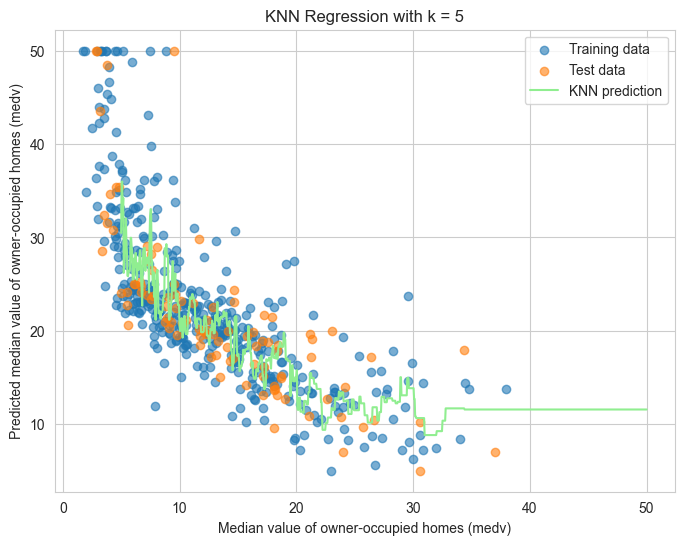

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, label='Training data', alpha=0.6)
plt.scatter(X_test, y_test, label='Test data', alpha=0.6)

#  knn prediction line
x_plot = np.linspace(y_train.min(), y_train.max(), 1000).reshape(-1, 1)
y_plot = knn.predict(x_plot)
plt.plot(x_plot, y_plot, color='lightgreen', label='KNN prediction')

plt.title('KNN Regression with k = {}'.format(k))
plt.xlabel('Median value of owner-occupied homes (medv)')
plt.ylabel('Predicted median value of owner-occupied homes (medv)')
plt.legend()
plt.show()